In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Get the Data from the Dataset

In [3]:
std = pd.read_csv('student_info.csv')

In [4]:
std

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
std.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
std.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


#### Descriptive Statistics

In [7]:
std.describe()     #Here,we get,all the numerical Calcualations

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


#### Data Visualization

In [8]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


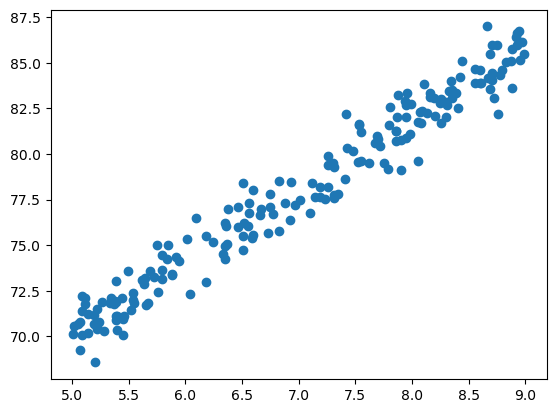

In [9]:
plt.scatter(x=std['study_hours'],y=std['student_marks']) # these data represents the Positive Co-relation
                                                         # Then both the data points move towards the same Direction,i.e left to right in upward Direction

#### Data Preparation for the Machine Learning Algorithm

In [10]:
std.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
std.duplicated().sum()

0

In [12]:
std_mean = round(std.mean())

In [13]:
std_mean

study_hours       7.0
student_marks    78.0
dtype: float64

In [14]:
study_hours_mean = np.round(std['study_hours'].mean())

In [15]:
study_hours_mean

7.0

In [16]:
std2 = std.fillna(study_hours_mean)

In [17]:
std2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [18]:
std2.duplicated().sum()

0

In [19]:
std2.head(2)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74


#### Split the data into Dependent and Independent Variables

In [20]:
x = std2[['study_hours']]

In [21]:
y = std2[['student_marks']]

#### Again split the data for model_selection

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
print('shape of x_train :',x_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_train :',y_train.shape)
print('shape of y_test :',x_test.shape)

shape of x_train : (160, 1)
shape of x_test : (40, 1)
shape of y_train : (160, 1)
shape of y_test : (40, 1)


#### Select the suitable ML model to predict the future

In [24]:
#Here, the Single dependent Variable is COntinous, then go for Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#SLOPE
m = lr.coef_
print(m)

[[3.93028185]]


In [28]:
#INTERCEPT
c = lr.intercept_
print(c)

[50.45086928]


In [29]:
# y = mx + c ---------->this is the formula for the predictions

In [31]:
# x = 5
y5 = m * 5 + c
print(y5)

[[70.10227852]]


In [32]:
# x = 7
y7 = m * 7 + c
print(y2)

NameError: name 'y2' is not defined

In [33]:
# x= 6
y6 = m * 6 + c
print(y6)

[[74.03256037]]


In [ ]:
# x = 9.5
y_9  = m * 9.5 + c
print('y @ 9.5---->',y_9)

In [ ]:
# x = 10.5
y = m * 10.5 + c
print(" y @ 10.5--->",y)

In [ ]:
lr.predict([[6]])

In [ ]:
lr.predict([[9.5]])

In [ ]:
lr.predict([[10.5]])[0][0].round(2)

In [ ]:
marks_pred = lr.predict(x_test)

##### creating a DataFrame and inserting  the ORIGINAL and PREDICTED values

In [ ]:
std_pred = pd.DataFrame(np.c_[x_test,y_test,marks_pred],columns=['std_study_hours','std_originl_marks','std_predicted_marks'])

#### Fine - Tune our Model

In [ ]:
#VARIANCE
var = lr.score(x_test,y_test)
print(var)
#BIAS
bias = lr.score(x_train,y_train)
print(bias)
print('----------------------------------')
# the model is perfectly good...Because,there is no OVERFITTING and UNDERFITTING

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('Student_study_time in HOURS')
plt.ylabel('student_marks')
plt.show()

###  Save the Model

In [ ]:
#PRESENTING THE SOLUTION

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'students_marks_predictor.pkl',)

In [ ]:
model = joblib.load('students_marks_predictor.pkl')

In [ ]:
model.predict([[4]])

In [ ]:
model.predict([[4]])[0]

In [ ]:
model.predict([[4]])[0][0]